# Daniela Quijano, Machine Learning

The purpose of this notebook is to apply the logistic regression model to the iris dataset. Please see the bottom of the notebook for discussion.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [186]:
#Import data nad print first few lines
iris=pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/IRIS.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
iris.info() #Obtain more information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


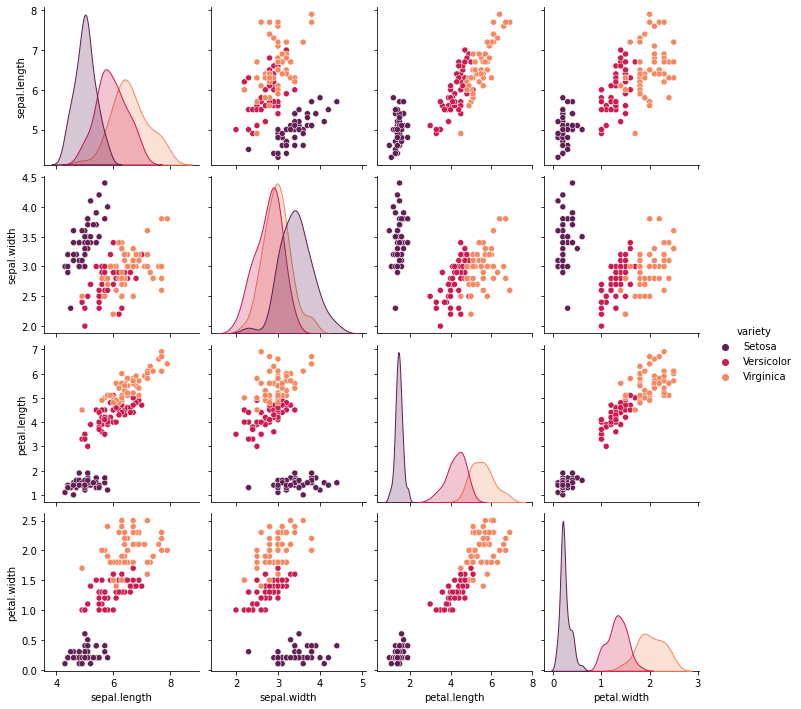

In [23]:
sns.pairplot(iris,hue='variety',palette='rocket') #Visualize the data all at once with a pairplot
#We can see here that the features are clustered which will help the model make more accurate predictions

## Train model with four features

In [97]:
X_four=iris.drop('variety',axis=1) #Features, drop the target column since we are trying to predict variety
y_four=iris['variety'] #value that is to be predicted

In [98]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X_four, 
                                                    y_four, test_size=0.30, random_state=101)
#Arbitrarily picked random state 
logmodel = LogisticRegression()#Create instance of logistic regression model
logmodel.fit(X_train,y_train) #fit training to model

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
predict_four = logmodel.predict(X_test)  #store model predictions in a variable 
print('Using four features yields to 98% classification success:')
print(classification_report(y_test,predict_four)) #classification report summarizes model performance


Using four features yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
Regularization, L1

In [267]:
logmodel= LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel.fit(X_train,y_train)
predict = logmodel.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [268]:
logmodel= LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel.fit(X_train,y_train)
predict = logmodel.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
Regualrization, l2

In [269]:
logmodel = LogisticRegression(penalty="l2", C=0.1)
logmodel.fit(X_train,y_train)
predict = logmodel.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [270]:
logmodel = LogisticRegression(penalty="l2", C=100)
logmodel.fit(X_train,y_train)
predict = logmodel.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Train Model with all four cases of using three features at a time

### Sepal length, sepal width petal length

In [187]:
iris3a=iris.drop('petal.width', axis=1)
X3a=iris3a.drop('variety', axis=1) #Eliminate target and feature not being used
y3a=iris3a['variety']
iris3a.head()

,sepal.length,sepal.width,petal.length,variety
0,5.1,3.5,1.4,Setosa
1,4.9,3.0,1.4,Setosa
2,4.7,3.2,1.3,Setosa
3,4.6,3.1,1.5,Setosa
4,5.0,3.6,1.4,Setosa


In [188]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X3a, 
                                                    y3a, test_size=0.30, random_state=101)

logmodel_3a= LogisticRegression()#Create instance of logistic regression model
logmodel_3a.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [189]:
predict_3a = logmodel_3a.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, sepal width and petal length yields to 98% classification success:')
print(classification_report(y_test,predict_3a))


Using sepal length, sepal width and petal length yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Changing Regularization Paramenters

L2 Regularization

In [198]:
#Regularization is a technique used to prevent overfitting model
logmodel_3a = LogisticRegression(penalty="l2", C=100)
logmodel_3a.fit(X_train,y_train)
predict_3a = logmodel_3a.predict(X_test)
print(classification_report(y_test,predict_3a))



              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
#Change C to 1
logmodel_3a = LogisticRegression(penalty="l2", C=0.1)
logmodel_3a.fit(X_train,y_train)
predict_3a = logmodel_3a.predict(X_test)
print(classification_report(y_test,predict_3a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



L1 Regularization

In [202]:
logmodel_3a = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3a.fit(X_train,y_train)
predict_3a = logmodel_3a.predict(X_test)
print(classification_report(y_test,predict_3a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [203]:
logmodel_3a = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
logmodel_3a.fit(X_train,y_train)
predict_3a = logmodel_3a.predict(X_test)
print(classification_report(y_test,predict_3a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Sepal length, sepal width, petal width

In [117]:
iris3b=iris.drop('petal.length', axis=1)
X3b=iris3b.drop('variety', axis=1) #Eliminate target and feature not being used
y3b=iris3b['variety']
iris3b.head()

,sepal.length,sepal.width,petal.width,variety
0,5.1,3.5,0.2,Setosa
1,4.9,3.0,0.2,Setosa
2,4.7,3.2,0.2,Setosa
3,4.6,3.1,0.2,Setosa
4,5.0,3.6,0.2,Setosa


In [118]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X3b, 
                                                    y3b, test_size=0.30, random_state=101)

logmodel_3b= LogisticRegression()#Create instance of logistic regression model
logmodel_3b.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [121]:
predict_3b = logmodel_3b.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, sepal width and petal width yields to 96% classification success:')
print(classification_report(y_test,predict_3b))


Using sepal length, sepal width and petal width yields to 96% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
Regularization, L2

In [204]:
logmodel_3b = LogisticRegression(penalty="l2", C=100)
logmodel_3b.fit(X_train,y_train)
predict_3b = logmodel_3b.predict(X_test)
print(classification_report(y_test,predict_3b))


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
logmodel_3b = LogisticRegression(penalty="l2", C=0.1)
logmodel_3b.fit(X_train,y_train)
predict_3b = logmodel_3b.predict(X_test)
print(classification_report(y_test,predict_3b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



Regularization L1

In [206]:
logmodel_3b = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3b.fit(X_train,y_train)
predict_3b = logmodel_3b.predict(X_test)
print(classification_report(y_test,predict_3b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [207]:
logmodel_3b = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3b.fit(X_train,y_train)
predict_3b = logmodel_3b.predict(X_test)
print(classification_report(y_test,predict_3b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Sepal length, petal length, petal width

In [122]:
iris3c=iris.drop('sepal.width', axis=1)
X3c=iris3c.drop('variety', axis=1) #Eliminate target and feature not being used
y3c=iris3c['variety']
iris3c.head()

,sepal.length,petal.length,petal.width,variety
0,5.1,1.4,0.2,Setosa
1,4.9,1.4,0.2,Setosa
2,4.7,1.3,0.2,Setosa
3,4.6,1.5,0.2,Setosa
4,5.0,1.4,0.2,Setosa


In [123]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X3c, 
                                                    y3c, test_size=0.30, random_state=101)

logmodel_3c= LogisticRegression()#Create instance of logistic regression model
logmodel_3c.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [125]:
predict_3c = logmodel_3c.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, petal length and petal width yields to 98% classification success:')
print(classification_report(y_test,predict_3c))


Using sepal length, petal length and petal width yields to 27% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
Regularization L2

In [208]:
logmodel_3c = LogisticRegression(penalty="l2", C=100)
logmodel_3c.fit(X_train,y_train)
predict_3c = logmodel_3c.predict(X_test)
print(classification_report(y_test,predict_3c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
logmodel_3c = LogisticRegression(penalty="l2", C=0.1)
logmodel_3c.fit(X_train,y_train)
predict_3c = logmodel_3c.predict(X_test)
print(classification_report(y_test,predict_3c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



Regularization L1

In [211]:
logmodel_3c = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3c.fit(X_train,y_train)
predict_3c = logmodel_3c.predict(X_test)
print(classification_report(y_test,predict_3c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [212]:
logmodel_3c = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3c.fit(X_train,y_train)
predict_3c = logmodel_3c.predict(X_test)
print(classification_report(y_test,predict_3c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Sepal width, petal length, petal width

In [126]:
iris3d=iris.drop('sepal.length', axis=1)
X3d=iris3d.drop('variety', axis=1) #Eliminate target and feature not being used
y3d=iris3d['variety']
iris3d.head()

,sepal.width,petal.length,petal.width,variety
0,3.5,1.4,0.2,Setosa
1,3.0,1.4,0.2,Setosa
2,3.2,1.3,0.2,Setosa
3,3.1,1.5,0.2,Setosa
4,3.6,1.4,0.2,Setosa


In [127]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X3d, 
                                                    y3d, test_size=0.30, random_state=101)

logmodel_3d= LogisticRegression()#Create instance of logistic regression model
logmodel_3d.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [128]:
predict_3d = logmodel_3d.predict(X_test)  #store model predictions in a variable 
print('Using sepal with, petal length and petal width yields to 98% classification success:')
print(classification_report(y_test,predict_3d))


Using sepal length, petal length and petal width yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
Regularization, L2

In [213]:
logmodel_3d = LogisticRegression(penalty="l2", C=100)
logmodel_3d.fit(X_train,y_train)
predict_3d = logmodel_3d.predict(X_test)
print(classification_report(y_test,predict_3d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
logmodel_3d = LogisticRegression(penalty="l2", C=0.1)
logmodel_3d.fit(X_train,y_train)
predict_3d = logmodel_3d.predict(X_test)
print(classification_report(y_test,predict_3d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



Regularization, L1

In [215]:
logmodel_3d = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3d.fit(X_train,y_train)
predict_3d = logmodel_3d.predict(X_test)
print(classification_report(y_test,predict_3d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [216]:
logmodel_3d = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_3d.fit(X_train,y_train)
predict_3d = logmodel_3d.predict(X_test)
print(classification_report(y_test,predict_3d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

# Train model with all six cases of using two fetures at a time

### sepal length, sepal width

In [108]:
iris2a=iris.drop(['petal.width','petal.length'], axis=1) #Leave out two categories not being used
X2a=iris2a.drop('variety', axis=1) #Eliminate target and feature not being used
y2a=iris2a['variety']
iris2a.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [109]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2a, 
                                                    y2a, test_size=0.30, random_state=101)

logmodel_2a= LogisticRegression()#Create instance of logistic regression model
logmodel_2a.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [111]:
predict_2a = logmodel_2a.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, sepal width yields to 79% classification success:')
print(classification_report(y_test,predict_2a))


Using sepal length, sepal width yields to 79% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      0.92      0.96        13
  Versicolor       0.78      0.70      0.74        20
   Virginica       0.60      0.75      0.67        12

    accuracy                           0.78        45
   macro avg       0.79      0.79      0.79        45
weighted avg       0.79      0.78      0.78        45



In [ ]:
Regularization, L2

In [217]:
logmodel_2a = LogisticRegression(penalty="l2", C=100)
logmodel_2a.fit(X_train,y_train)
predict_2a = logmodel_2a.predict(X_test)
print(classification_report(y_test,predict_2a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
logmodel_2a = LogisticRegression(penalty="l2", C=0.1)
logmodel_2a.fit(X_train,y_train)
predict_2a = logmodel_2a.predict(X_test)
print(classification_report(y_test,predict_2a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



Regularization, L1

In [220]:
logmodel_2a = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2a.fit(X_train,y_train)
predict_2a = logmodel_2a.predict(X_test)
print(classification_report(y_test,predict_2a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [221]:
logmodel_2a = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2a.fit(X_train,y_train)
predict_2a = logmodel_2a.predict(X_test)
print(classification_report(y_test,predict_2a))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Sepal length, petal length

In [137]:
iris2b=iris.drop(['sepal.width','petal.width'], axis=1) #Leave out two categories not being used
X2b=iris2b.drop('variety', axis=1) #Eliminate target and feature not being used
y2b=iris2b['variety']
iris2b.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


In [138]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2b, 
                                                    y2b, test_size=0.30, random_state=101)

logmodel_2b= LogisticRegression()#Create instance of logistic regression model
logmodel_2b.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [139]:
predict_2b = logmodel_2b.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, petal length yields to 98% classification success:')
print(classification_report(y_test,predict_2b))


Using sepal length, petal length yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
Regularization, L2

In [224]:
logmodel_2b = LogisticRegression(penalty="l2", C=0.1)
logmodel_2b.fit(X_train,y_train)
predict_2b = logmodel_2b.predict(X_test)
print(classification_report(y_test,predict_2b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



In [226]:
logmodel_2b = LogisticRegression(penalty="l2", C=100)
logmodel_2b.fit(X_train,y_train)
predict_2b = logmodel_2b.predict(X_test)
print(classification_report(y_test,predict_2b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      1.00      0.98        20
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Regularization, L1

In [222]:
logmodel_2b = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2b.fit(X_train,y_train)
predict_2b = logmodel_2b.predict(X_test)
print(classification_report(y_test,predict_2b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [223]:
logmodel_2b = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2b.fit(X_train,y_train)
predict_2b = logmodel_2b.predict(X_test)
print(classification_report(y_test,predict_2b))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Sepal length, petal width

In [228]:
iris2c=iris.drop(['sepal.width','petal.length'], axis=1) #Leave out two categories not being used
X2c=iris2c.drop('variety', axis=1) #Eliminate target and feature not being used
y2c=iris2c['variety']
iris2c.head()

,sepal.length,petal.width,variety
0,5.1,0.2,Setosa
1,4.9,0.2,Setosa
2,4.7,0.2,Setosa
3,4.6,0.2,Setosa
4,5.0,0.2,Setosa


In [229]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2c, 
                                                    y2c, test_size=0.30, random_state=101)

logmodel_2c= LogisticRegression()#Create instance of logistic regression model
logmodel_2c.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [230]:
predict_2c = logmodel_2c.predict(X_test)  #store model predictions in a variable 
print('Using sepal length, petal width yields to 96% classification success:')
print(classification_report(y_test,predict_2c))


Using sepal length, petal width yields to 96% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Regularization, L1

In [233]:
logmodel_2c = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2c.fit(X_train,y_train)
predict_2c = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [234]:
logmodel_2c = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2c.fit(X_train,y_train)
predict_2c = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
Regularization, l2

In [236]:
logmodel_2c = LogisticRegression(penalty="l2", C=100)
logmodel_2c.fit(X_train,y_train)
predict_2c = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2c))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.90      0.95      0.93        20
   Virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [237]:
logmodel_2c = LogisticRegression(penalty="l2", C=0.1)
logmodel_2c.fit(X_train,y_train)
predict_2c = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2c))

              precision    recall  f1-score   support

      Setosa       0.93      1.00      0.96        13
  Versicolor       1.00      0.60      0.75        20
   Virginica       0.63      1.00      0.77        12

    accuracy                           0.82        45
   macro avg       0.85      0.87      0.83        45
weighted avg       0.88      0.82      0.82        45



### Sepal width petal length

In [239]:
iris2d=iris.drop(['sepal.length','petal.width'], axis=1) #Leave out two categories not being used
X2d=iris2d.drop('variety', axis=1) #Eliminate target and feature not being used
y2d=iris2d['variety']
iris2d.head()

,sepal.width,petal.length,variety
0,3.5,1.4,Setosa
1,3.0,1.4,Setosa
2,3.2,1.3,Setosa
3,3.1,1.5,Setosa
4,3.6,1.4,Setosa


In [240]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2d, 
                                                    y2d, test_size=0.30, random_state=101)

logmodel_2d= LogisticRegression()#Create instance of logistic regression model
logmodel_2d.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [241]:
predict_2d = logmodel_2d.predict(X_test)  #store model predictions in a variable 
print('Using sepal width, petal length yields to 98% classification success:')
print(classification_report(y_test,predict_2d))


Using sepal width, petal length yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
Regularization, L1

In [246]:
logmodel_2d = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2d.fit(X_train,y_train)
predict_2d = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [247]:
logmodel_2d = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2d.fit(X_train,y_train)
predict_2d = logmodel_2c.predict(X_test)
print(classification_report(y_test,predict_2d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification

In [ ]:
Regularization, L2

In [242]:
logmodel_2d = LogisticRegression(penalty="l2", C=0.1)
logmodel_2d.fit(X_train,y_train)
predict_2d = logmodel_2d.predict(X_test)
print(classification_report(y_test,predict_2d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.85      0.92        20
   Virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



In [243]:
logmodel_2d = LogisticRegression(penalty="l2", C=100)
logmodel_2d.fit(X_train,y_train)
predict_2d = logmodel_2d.predict(X_test)
print(classification_report(y_test,predict_2d))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Sepal width petal width 

In [249]:
iris2e=iris.drop(['sepal.length','petal.length'], axis=1) #Leave out two categories not being used
X2e=iris2e.drop('variety', axis=1) #Eliminate target and feature not being used
y2e=iris2e['variety']
iris2e.head()

,sepal.width,petal.width,variety
0,3.5,0.2,Setosa
1,3.0,0.2,Setosa
2,3.2,0.2,Setosa
3,3.1,0.2,Setosa
4,3.6,0.2,Setosa


In [250]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2e, 
                                                    y2e, test_size=0.30, random_state=101)

logmodel_2e= LogisticRegression()#Create instance of logistic regression model
logmodel_2e.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [251]:
predict_2e = logmodel_2e.predict(X_test)  #store model predictions in a variable 
print('Using sepal width, petal width yields to 94% classification success:')
print(classification_report(y_test,predict_2e))


Using sepal width, petal width yields to 94% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      0.92      0.96        13
  Versicolor       0.90      0.95      0.93        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



Regularization, L2

In [252]:
logmodel_2e = LogisticRegression(penalty="l2", C=100)
logmodel_2e.fit(X_train,y_train)
predict_2e = logmodel_2e.predict(X_test)
print(classification_report(y_test,predict_2e))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.90      0.90      0.90        20
   Virginica       0.83      0.83      0.83        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [253]:
logmodel_2e = LogisticRegression(penalty="l2", C=0.1)
logmodel_2e.fit(X_train,y_train)
predict_2e = logmodel_2e.predict(X_test)
print(classification_report(y_test,predict_2e))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.93      0.70      0.80        20
   Virginica       0.65      0.92      0.76        12

    accuracy                           0.84        45
   macro avg       0.86      0.87      0.85        45
weighted avg       0.88      0.84      0.85        45



Regularization L1

In [254]:
logmodel_2e = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2e.fit(X_train,y_train)
predict_2e = logmodel_2e.predict(X_test)
print(classification_report(y_test,predict_2e))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.90      0.95      0.93        20
   Virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [256]:
logmodel_2e = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2e.fit(X_train,y_train)
predict_2e = logmodel_2e.predict(X_test)
print(classification_report(y_test,predict_2e))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Petal length, petal width 

In [260]:
iris2f=iris.drop(['sepal.length','sepal.width'], axis=1) #Leave out two categories not being used
X2f=iris2f.drop('variety', axis=1) #Eliminate target and feature not being used
y2f=iris2f['variety']
iris2f.head()

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


In [261]:
#using 30% of data in iris as the test size 
X_train, X_test, y_train, y_test = train_test_split(X2f, 
                                                    y2f, test_size=0.30, random_state=101)

logmodel_2f= LogisticRegression()#Create instance of logistic regression model
logmodel_2f.fit(X_train,y_train) #fit training to model

LogisticRegression()

In [262]:
predict_2f = logmodel_2f.predict(X_test)  #store model predictions in a variable 
print('Using petal length, petal width yields to 98% classification success:')
print(classification_report(y_test,predict_2f))

Using petal length, petal width yields to 98% classification success:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Regularization, L1

In [263]:
logmodel_2f = LogisticRegression(penalty="l1", C=0.1, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2f.fit(X_train,y_train)
predict_2f = logmodel_2f.predict(X_test)
print(classification_report(y_test,predict_2f))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        20
   Virginica       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [264]:
logmodel_2f = LogisticRegression(penalty="l1", C=100, solver='liblinear' )
#Have to change solver to liblinear since it supports L1 regularization
logmodel_2f.fit(X_train,y_train)
predict_2f = logmodel_2f.predict(X_test)
print(classification_report(y_test,predict_2f))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.95      0.95      0.95        20
   Virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Regualrization L2

In [265]:
logmodel_2f = LogisticRegression(penalty="l2", C=0.1)
logmodel_2f.fit(X_train,y_train)
predict_2f = logmodel_2f.predict(X_test)
print(classification_report(y_test,predict_2f))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [266]:
logmodel_2f = LogisticRegression(penalty="l2", C=100)
logmodel_2f.fit(X_train,y_train)
predict_2f = logmodel_2f.predict(X_test)
print(classification_report(y_test,predict_2f))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text summary of findings:

All: 98

Sepal width, petal length, petal width 98
Sepal length, petal length, petal width 96
Sepal length, sepal width, petal width 98
Sepal length, sepal width petal length 98

sepal length, sepal width 79
sepal length, petal length 98
sepal length, petal width 96
sepal width, petal length 98
sepal width, petal width 94
petal length, petal width 98

## Summarizing Results

In [279]:
#Make a list of the prediction accuracy for each model
#Make a list of strings to name the rows in a table 
rownames=['All categories','S length, S width, P length', 'S width, P length, P width','S length, P length, P width','S length, S width, P width','S length, S width P length','S length, S width','S length, P length','S length, P width','S width, P length','S width, P width','P length, P width']
prectiction_acc=[98,98,96,98,98,79,98,96,98,94,98]
L1_100=[96,96,96,96,96,96,96,39,93,96,96]
L1_01=[39,39,39,39,39,39,39,39,39,39,39]
L2_100=[98,98,98,98,98,98,93,98,91,98,98]
L2_01=[95,95,95,95,95,95,88,95,88,98,98]

#Make a table to summarize findings
zipped = list(zip(rownames, prectiction_acc,L1_100,L1_01,L2_100,L2_01))
df = pd.DataFrame(zipped, columns=['Groups', 'Weighed Prediction Accuracy','L1_100','L1_01','L2_100','L2_01'])
print(df)

                         Groups  Weighed Prediction Accuracy  L1_100  L1_01  \
0                All categories                           98      96     39   
1   S length, S width, P length                           98      96     39   
2    S width, P length, P width                           96      96     39   
3   S length, P length, P width                           98      96     39   
4    S length, S width, P width                           98      96     39   
5    S length, S width P length                           79      96     39   
6             S length, S width                           98      96     39   
7            S length, P length                           96      39     39   
8             S length, P width                           98      93     39   
9             S width, P length                           94      96     39   
10             S width, P width                           98      96     39   

    L2_100  L2_01  
0       98     95  
1       98 

<AxesSubplot:xlabel='Groups', ylabel='Weighed Prediction Accuracy'>

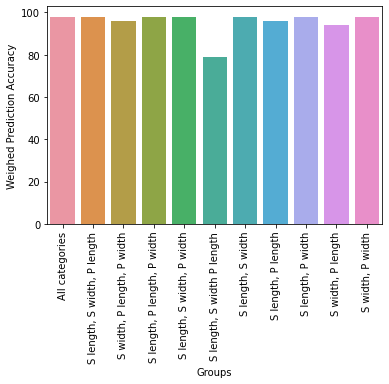

In [175]:
#Make a barplot of each of the groups and corresponding prediction accuracy
plot = sns.barplot(x='Groups', y="Weighed Prediction Accuracy", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot

Discuss your findings. Does using more dimensions help when trying to classify the data in this dataset? How important is regularization in these cases?
As demonstrated in the pair plot in kernel 23, the features that are the Least clustered are sepal width and sepal length. I expected the model with these features alone to have a lower performance since there may be a higher rate of misclassification. Regularization did not raise the preditction accuracy above the already seen 98%. The l1 regualrization did not help the model prediction accuracy as much as the l2 regularization. L1 regularization estimates values around the median of the data whereas L2 regualrization estimates the values arround the mean of the data. The mean of the data is more reliant on extreme or outlier valeus and could be a reason why L1 regularization had a detrimental effect on the data since it did not account for more extreme values. The dataset that performed the worst in general without any regularization correction was the group with Sepal length, sepal width and petal length. This is not undxpected since it was already known that sepal length and sepal width are not linearly separable, the third category, petal width marginally contributed to the model's aboility to distinguish between flower species. 
The regularization term, C regulates against overfitting the data. The higher the value of C, the higher the weight that is given to the training data. The lower the value of C the higher the value given to test data. In this case a lower value of C led to worse prediction outcomes for both L1 and L2 regularization since test data may have had more extreme instances that the model may not have seen therefoer leading to high penalties for these values that didnt fit what the model had learned. 